# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


**Описание тарифов**


**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей


**Описание данных**


**Таблица users (информация о пользователях):**


user_id — уникальный идентификатор пользователя


first_name — имя пользователя


last_name — фамилия пользователя


age — возраст пользователя (годы)


reg_date — дата подключения тарифа (день, месяц, год)


churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)


city — город проживания пользователя


tariff — название тарифного плана


**Таблица calls (информация о звонках):**


id — уникальный номер звонка


call_date — дата звонка


duration — длительность звонка в минутах


user_id — идентификатор пользователя, сделавшего звонок


Таблица messages (информация о сообщениях):


id — уникальный номер сообщения


message_date — дата сообщения


user_id — идентификатор пользователя, отправившего сообщение


**Таблица internet (информация об интернет-сессиях):**


id — уникальный номер сессии


mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)


session_date — дата интернет-сессии


user_id — идентификатор пользователя


**Таблица tariffs (информация о тарифах):**


tariff_name — название тарифа


rub_monthly_fee — ежемесячная абонентская плата в рублях


minutes_included — количество минут разговора в месяц, включённых в абонентскую плату


messages_included — количество сообщений в месяц, включённых в абонентскую плату


mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)


rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 
101 минуты будет взиматься плата)


rub_per_message — стоимость отправки сообщения сверх тарифного пакета


rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


**План выполенния проекта:**
1. Открытие файлов с данными и изучение общей информации
Путь к файлам:
/datasets/calls.csv, /datasets/internet.csv, /datasets/messages.csv, /datasets/tariffs.csv, /datasets/users.csv.


2. Подготовка данных
Приведение данные к нужным типам;
Поиск и исправление ошибок в данных, если они есть.
Пояснение, какие ошибки нашли и как их исправили. В данных имеются звонки с нулевой продолжительностью - нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
**Посчитать для каждого пользователя:**


количество сделанных звонков и израсходованных минут разговора по месяцам;


количество отправленных сообщений по месяцам;


объем израсходованного интернет-трафика по месяцам;


помесячную выручку с каждого пользователя (нужно отнять бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножить на значение из тарифного плана, прибавить абонентскую плату, соответствующую тарифному плану).


3. Анализ данных
Описание поведения клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.


4. Проверка гипотез
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задаём самостоятельно.
**Пояснение:**
как формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.


5. Общий вывод

## Изучение данных из файлов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import traceback
from scipy import stats as st
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 29)

In [2]:
data_all = {'calls': pd.Series(['calls.csv', []], index=['file_name', 'nan']), 
            'internet':pd.Series(['internet.csv', []], index=['file_name', 'nan']), 
            'messages': pd.Series(['messages.csv', []], index=['file_name', 'nan']), 
            'tariffs': pd.Series(['tariffs.csv', []], index=['file_name', 'nan']),
            'users':pd.Series(['users.csv', []], index=['file_name','nan'])}
local_path = 'C:/Users/timpu/DataScience_Projects/Стат_Анализ_Определение_перспективного_тарифа_для_телеком-компании/data/'
try:
    for key_name, all_data in data_all.items():
        data = pd.read_csv('/datasets/' + all_data['file_name'])
        all_data['data'] = data
except FileNotFoundError:
    for key_name, all_data in data_all.items():
        data = pd.read_csv(local_path + all_data['file_name'])
        all_data['data'] = data
except:
    print('Возникла ошибка в коде, нужно перепроверить!')
    traceback.print_exc()
else:
    for key_name, all_data in data_all.items():
        print('Общая информация о датасете', all_data['file_name'], ':')
        all_data['data'].info()
        display(all_data['data'])
        print('Минимальные значения в датасете', all_data['file_name'], ':')
        print(all_data['data'].min(), '\n')
        print('Максимальные значения в датасете', all_data['file_name'], ':')
        print(all_data['data'].max(), '\n')
        print('Количество дубликатов в датасете', all_data['file_name'], ':')
        print(all_data['data'].duplicated().sum(), '\n')
        all_data['nan'].append(all_data['data'].isna().sum())
        print('Колонки с пропущенными значениями в датасете:\n')
        print(all_data['nan'], '\n')

Общая информация о датасете calls.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Минимальные значения в датасете calls.csv :
id               1000_0
call_date    2018-01-01
duration            0.0
user_id            1000
dtype: object 

Максимальные значения в датасете calls.csv :
id              1499_99
call_date    2018-12-31
duration           38.0
user_id            1499
dtype: object 

Количество дубликатов в датасете calls.csv :
0 

Колонки с пропущенными значениями в датасете:

[id           0
call_date    0
duration     0
user_id      0
dtype: int64] 

Общая информация о датасете internet.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage:

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Минимальные значения в датасете internet.csv :
Unnamed: 0               0
id                  1000_0
mb_used                0.0
session_date    2018-01-01
user_id               1000
dtype: object 

Максимальные значения в датасете internet.csv :
Unnamed: 0          149395
id                 1499_99
mb_used            1724.83
session_date    2018-12-31
user_id               1499
dtype: object 

Количество дубликатов в датасете internet.csv :
0 

Колонки с пропущенными значениями в датасете:

[Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64] 

Общая информация о датасете messages.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
m

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Минимальные значения в датасете messages.csv :
id                  1000_0
message_date    2018-01-02
user_id               1000
dtype: object 

Максимальные значения в датасете messages.csv :
id                 1499_99
message_date    2018-12-31
user_id               1499
dtype: object 

Количество дубликатов в датасете messages.csv :
0 

Колонки с пропущенными значениями в датасете:

[id              0
message_date    0
user_id         0
dtype: int64] 

Общая информация о датасете tariffs.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null    

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Минимальные значения в датасете tariffs.csv :
messages_included           50
mb_per_month_included    15360
minutes_included           500
rub_monthly_fee            550
rub_per_gb                 150
rub_per_message              1
rub_per_minute               1
tariff_name              smart
dtype: object 

Максимальные значения в датасете tariffs.csv :
messages_included         1000
mb_per_month_included    30720
minutes_included          3000
rub_monthly_fee           1950
rub_per_gb                 200
rub_per_message              3
rub_per_minute               3
tariff_name              ultra
dtype: object 

Количество дубликатов в датасете tariffs.csv :
0 

Колонки с пропущенными значениями в датасете:

[messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64] 

Общая информация о датасете users.csv :
<class '

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Минимальные значения в датасете users.csv :
user_id              1000
age                    18
city          Архангельск
first_name      Авксентий
last_name          Ёлчина
reg_date       2018-01-01
tariff              smart
dtype: object 

Максимальные значения в датасете users.csv :
user_id             1499
age                   75
city           Ярославль
first_name           Яна
last_name          Яшина
reg_date      2018-12-31
tariff             ultra
dtype: object 

Количество дубликатов в датасете users.csv :
0 

Колонки с пропущенными значениями в датасете:

[user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64] 



### Вывод

Представленные в датасетах данные имеют пропуски только в датасете users.csv в колонке churn_date, которые означают продолжение пользования пользователем выбранным тарифом по состоянию на конец 2018 года. Столбцы всех датасетов, содержащих даты, неправильного типа данных. При выгрузке данных из internet.csv возник столбец 'Unnamed: 0', являющийся индексным столбцом. Также в выгрузке данных имеется столбец 'id', который также не имеет значения для исследования, поэтому мы эти столбцы исключим при предобработке данных.


## Предобработка данных

In [3]:
#df_all_pre_proces = data_all.copy()

for key_name, all_data in data_all.items():
    for col in all_data['data'].columns:
        if 'date' in col:
            all_data['data'][col] = all_data['data'][col].astype('datetime64[M]')
        if 'duration' in col:
            all_data['data'][col] = np.ceil(all_data['data'][col]).astype('int64')
        if col in ['Unnamed: 0', 'id']:
            all_data['data'] = all_data['data'].drop(col, axis = 1, errors='ignore')
    print('Общая информация о датасете:', all_data['file_name'])
    all_data['data'].info()
    print('\n')

Общая информация о датасете: calls.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  202607 non-null  datetime64[ns]
 1   duration   202607 non-null  int64         
 2   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.6 MB


Общая информация о датасете: internet.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mb_used       149396 non-null  float64       
 1   session_date  149396 non-null  datetime64[ns]
 2   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.4 MB


Общая информация о датасете: messages.csv
<class 'pandas.core.frame.DataFr

### Вывод

Проведена преобработка: изменён формат колонок '_date', продолжительность звонков округлена до целых в большую сторону в соотвествии с правилами биллинга оператора. Исключены лишние столбцы "Unnamed: 0", "id".

## Расчёты и добавление результатов в таблицы

In [4]:
#df_all_proces = df_all_pre_proces.copy()
#del df_all_pre_proces

data_all['messages']['data']['messages'] = 0
df_merge = pd.DataFrame()
print('Cчитаем помесячную продолжительность звонков (calls), количество сообщений (messages) и израсходованный интернет-трафик (internet):')
for key_name in ['calls', 'internet', 'messages']:
        for col in data_all[key_name]['data'].columns:
            if 'date' in col:
                data_all[key_name]['data'].rename(columns={col: key_name + '_month'}, inplace=True)
                
                data_all[key_name]['gr_by'] = (data_all[key_name]['data']
                                               .groupby(by=['user_id', key_name + '_month']).agg(['count', 'sum'])
                                              )
                data_all[key_name]['gr_by'] = (data_all[key_name]['gr_by']
                                               .drop(('duration','count'), axis = 1, errors='ignore')
                                              )
                data_all[key_name]['gr_by'] = (data_all[key_name]['gr_by']
                                               .drop(('mb_used','count'), axis = 1, errors='ignore')
                                              )
                data_all[key_name]['gr_by'] = (data_all[key_name]['gr_by']
                                               .drop(('messages','sum'), axis = 1, errors='ignore')
                                              )
                data_all[key_name]['gr_by'].columns = data_all[key_name]['gr_by'].columns.droplevel(1)
                data_all[key_name]['gr_by'] = data_all[key_name]['gr_by'].reset_index()
                
                data_all[key_name]['gr_by_disp'] = data_all[key_name]['gr_by'].copy()
                data_all[key_name]['gr_by_disp'][key_name + '_month'] = (data_all[key_name]['gr_by_disp'][key_name + '_month']
                                                                         .dt.strftime("%Y-%m")
                                                                        )
                display(data_all[key_name]['gr_by_disp'])
                data_all[key_name]['gr_by'].rename(columns={key_name + '_month': 'month'}, inplace=True)
                if not df_merge.empty:
                    df_merge = df_merge.merge(data_all[key_name]['gr_by'], how='outer', on=['user_id', 'month'])
                else:
                    df_merge = data_all[key_name]['gr_by'].copy()

print('Считаем помесячную выручку с каждого пользователя (monthly_revenue):')
df_merge['month'] = df_merge['month'].dt.strftime("%Y-%m")
df_merge.columns = ['user_id', 'month', 'calls_dur_sum', 'internet_used', 'messages_count']
df_merge = df_merge.merge(data_all['users']['data'][['user_id', 'tariff', 'city']], how='inner', on=['user_id'])
df_merge = df_merge.merge(data_all['tariffs']['data'], how='inner', left_on = 'tariff', right_on='tariff_name')
df_merge = df_merge.drop('tariff_name', axis = 1)
df_merge = df_merge.fillna(0)

df_merge['internet_used'] = np.ceil(df_merge['internet_used'] / 1024).astype('float64')
df_merge.rename(columns={'internet_used': 'internet_used_gb'}, inplace=True)
df_merge['mb_per_month_included'] = (df_merge['mb_per_month_included'] / 1024).astype('float64')
df_merge.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

df_merge.loc[(df_merge['calls_dur_sum'] <= df_merge['minutes_included']), 'calls_revenue_add'] = 0
df_merge.loc[(df_merge['calls_dur_sum'] > df_merge['minutes_included']), 'calls_revenue_add'] = (
    df_merge['calls_dur_sum'] - df_merge['minutes_included']) * df_merge['rub_per_minute']

df_merge.loc[(df_merge['internet_used_gb'] <= df_merge['gb_per_month_included']), 'internet_revenue_add'] = 0
df_merge.loc[(df_merge['internet_used_gb'] > df_merge['gb_per_month_included']), 'internet_revenue_add'] = (
    df_merge['internet_used_gb'] - df_merge['gb_per_month_included']) * df_merge['rub_per_gb']

df_merge.loc[(df_merge['messages_count'] <= df_merge['messages_included']), 'messages_revenue_add'] = 0
df_merge.loc[(df_merge['messages_count'] > df_merge['messages_included']), 'messages_revenue_add'] = (
    df_merge['messages_count'] - df_merge['messages_included']) * df_merge['rub_per_message']

df_merge['monthly_revenue'] = (
    df_merge['calls_revenue_add'] + df_merge['internet_revenue_add'] + df_merge['messages_revenue_add'] 
    + df_merge['rub_monthly_fee']
)

display(df_merge)


Cчитаем помесячную продолжительность звонков (calls), количество сообщений (messages) и израсходованный интернет-трафик (internet):


,user_id,calls_month,duration
0,1000,2018-05,159
1,1000,2018-06,172
2,1000,2018-07,340
3,1000,2018-08,408
4,1000,2018-09,466
...,...,...,...
3169,1498,2018-10,247
3170,1499,2018-09,70
3171,1499,2018-10,449
3172,1499,2018-11,612


,user_id,internet_month,mb_used
0,1000,2018-05,2253.49
1,1000,2018-06,23233.77
2,1000,2018-07,14003.64
3,1000,2018-08,14055.93
4,1000,2018-09,14568.91
...,...,...,...
3198,1498,2018-10,20579.36
3199,1499,2018-09,1845.75
3200,1499,2018-10,17788.51
3201,1499,2018-11,17963.31


,user_id,messages_month,messages
0,1000,2018-05,22
1,1000,2018-06,60
2,1000,2018-07,75
3,1000,2018-08,81
4,1000,2018-09,57
...,...,...,...
2712,1498,2018-10,42
2713,1499,2018-09,11
2714,1499,2018-10,48
2715,1499,2018-11,59


Считаем помесячную выручку с каждого пользователя (monthly_revenue):


,user_id,month,calls_dur_sum,internet_used_gb,messages_count,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue_add,internet_revenue_add,messages_revenue_add,monthly_revenue
0,1000,2018-05,159.0,3.0,22.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,2018-06,172.0,23.0,60.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,2018-07,340.0,14.0,75.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,2018-08,408.0,14.0,81.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,2018-09,466.0,15.0,57.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08,0.0,11.0,17.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0
3210,1489,2018-09,0.0,17.0,32.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,0.0,400.0,0.0,950.0
3211,1489,2018-10,0.0,20.0,21.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,0.0,1000.0,0.0,1550.0
3212,1489,2018-11,0.0,18.0,20.0,smart,Санкт-Петербург,50,15.0,500,550,200,3,3,0.0,600.0,0.0,1150.0


### Вывод 

В данном разделе поситали помесячную продолжительность звонков (calls-duration-sum), количество сообщений (messages-messages-count) и израсходованный интернет-трафик (internet-mb_used-sum), сгруппировав данные по id пользователя и месяцу пользования услугами. Затем посчитали ежемесячный доход monthly_revenue от каждого пользователя с учётом выбранного им тарифа, включающего различные опции за различную абонентскую плату. 

## Исследовательский анализ данных

### Опиcание поведения клиентов оператора, исходя из выборки. Определение количества минут разговора, количества сообщений и объёма интернет-трафика, расходуемого пользователями каждого тарифа в месяц. Расчёт среднего количества, дисперсии и стандартного отклонения. Построение гистограмм. Описание распределения.

In [5]:
print('Поиск и удаление аномальных значений в датасете универсальным методом (1,5*IQR):\n')
col_ns = []
num_cl = 0 
#df_merge_clear = df_merge.copy()
#del df_merge

for col in df_merge.columns:
    try:
        q25, q75 = np.percentile(df_merge[col], [25, 75])
        IQR = q75 - q25
        max_ = round(q75+(1.5*IQR), 2)
        min_ = round(q25-(1.5*IQR), 2)
        print(col, f'- граница верхнего уса ящика = {max_}') if max_ != df_merge[col].max() else print(col, '- граница верхнего уса ящика = максимальному значению')
        print(col, f'- граница нижнего уса ящика = {min_}\n') if min_ >= 0 else print(col, '- граница нижнего уса ящика = 0\n')
        num_cl += df_merge.loc[df_merge[col] < min_, col].count()
        df_merge.loc[df_merge[col] < min_, col] = df_merge[col].median()
        num_cl += df_merge.loc[df_merge[col] > max_, col].count()
        df_merge.loc[df_merge[col] > max_, col] = df_merge[col].median()
        col_ns.append(col)
    except:
        next

Поиск и удаление аномальных значений в датасете универсальным методом (1,5*IQR):

user_id - граница верхнего уса ящика = 1759.38
user_id - граница нижнего уса ящика = 744.38

calls_dur_sum - граница верхнего уса ящика = 1049.5
calls_dur_sum - граница нижнего уса ящика = 0

internet_used_gb - граница верхнего уса ящика = 33.0
internet_used_gb - граница нижнего уса ящика = 1.0

messages_count - граница верхнего уса ящика = 129.0
messages_count - граница нижнего уса ящика = 0

messages_included - граница верхнего уса ящика = 2425.0
messages_included - граница нижнего уса ящика = 0

gb_per_month_included - граница верхнего уса ящика = 52.5
gb_per_month_included - граница нижнего уса ящика = 0

minutes_included - граница верхнего уса ящика = 6750.0
minutes_included - граница нижнего уса ящика = 0

rub_monthly_fee - граница верхнего уса ящика = 4050.0
rub_monthly_fee - граница нижнего уса ящика = 0

rub_per_gb - граница верхнего уса ящика = 275.0
rub_per_gb - граница нижнего уса ящика = 75.0

In [6]:
print('Доля редких и выбивающихся (аномальных) значений к исходному количеству записей составляет:')
print(round(num_cl/df_merge.size, 4)*100, '%')

Доля редких и выбивающихся (аномальных) значений к исходному количеству записей составляет:
2.96 %


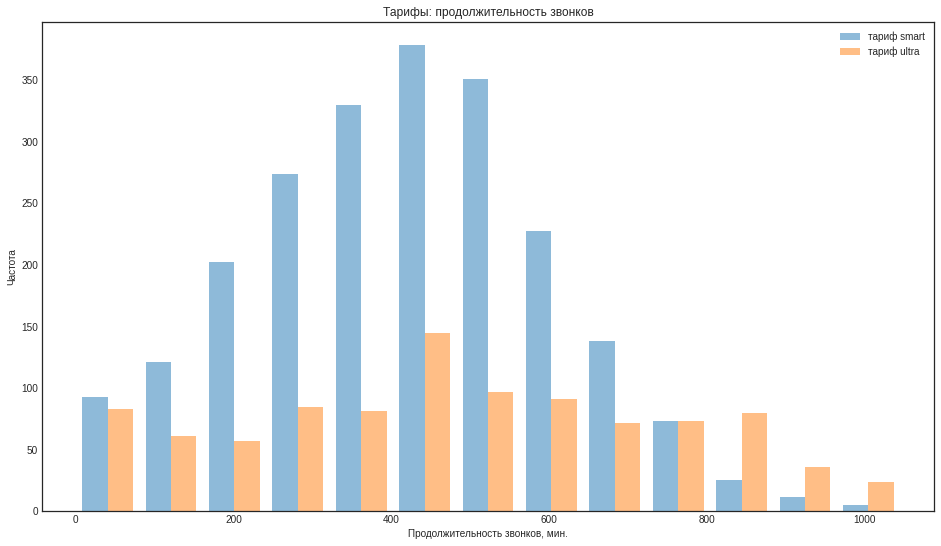

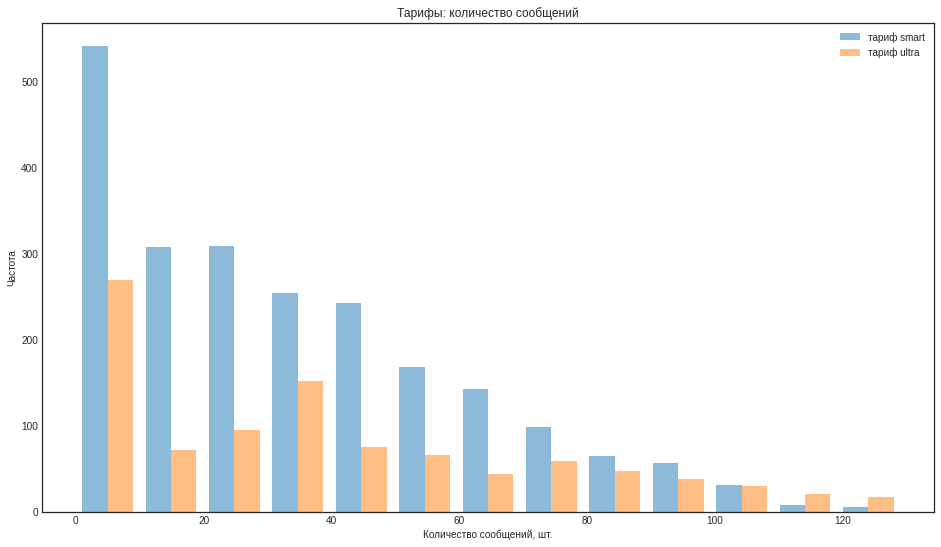

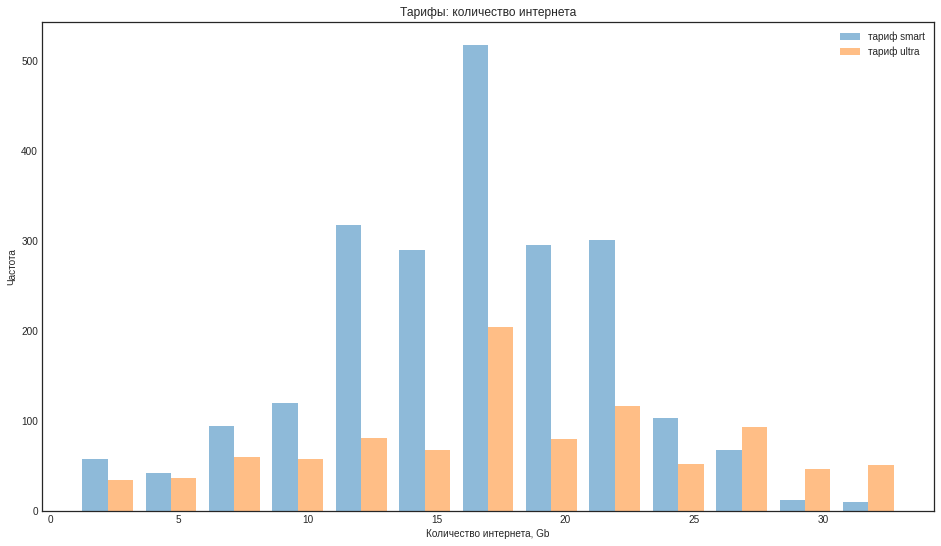

Продолжительность звонков, количество сообщений, количество интернета по тарифам: среднее, дисперсия, 
      стандартное отклонение за 2018 г.:


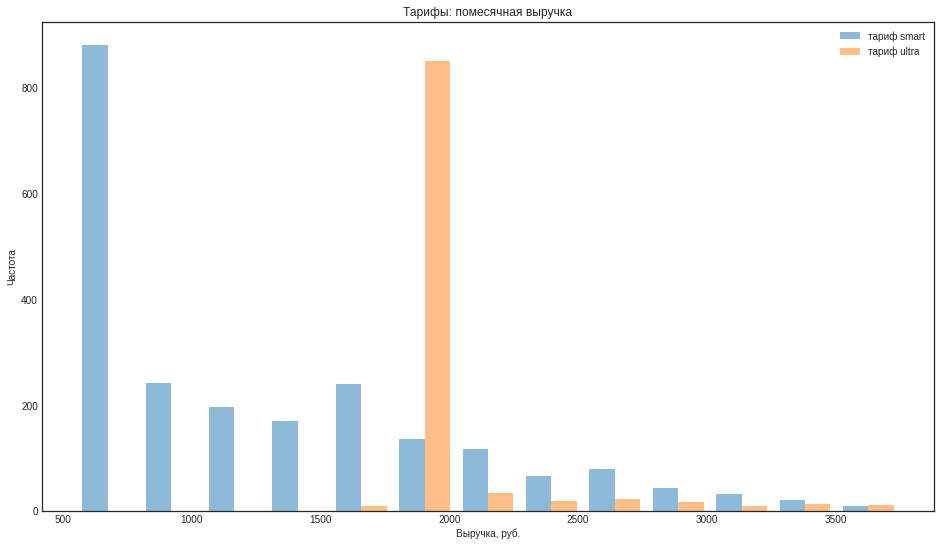

In [7]:
plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))
plt.hist([df_merge[df_merge['tariff'] == 'smart']['calls_dur_sum'], 
          df_merge[df_merge['tariff'] == 'ultra']['calls_dur_sum']], 
         bins='sturges', alpha=0.5, label=['тариф smart', 'тариф ultra'])

plt.legend(loc='upper right')
plt.title(f'Тарифы: продолжительность звонков')
plt.xlabel('Продолжительность звонков, мин.')
plt.ylabel("Частота")
plt.show()
plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))
plt.hist([df_merge[df_merge['tariff'] == 'smart']['messages_count'], 
          df_merge[df_merge['tariff'] == 'ultra']['messages_count']], 
         bins='sturges', alpha=0.5, label=['тариф smart', 'тариф ultra'])

plt.legend(loc='upper right')
plt.title(f'Тарифы: количество сообщений')
plt.xlabel('Количество сообщений, шт.')
plt.ylabel("Частота")
plt.show()
plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))
plt.hist([df_merge[df_merge['tariff'] == 'smart']['internet_used_gb'], 
          df_merge[df_merge['tariff'] == 'ultra']['internet_used_gb']], 
         bins='sturges', alpha=0.5, label=['тариф smart', 'тариф ultra'])

plt.legend(loc='upper right')
plt.title(f'Тарифы: количество интернета')
plt.xlabel('Количество интернета, Gb')
plt.ylabel("Частота")
plt.show()
print("""Продолжительность звонков, количество сообщений, количество интернета по тарифам: среднее, дисперсия, 
      стандартное отклонение за 2018 г.:""")
display(df_merge.groupby(by='tariff')[['calls_dur_sum', 'messages_count', 'internet_used_gb', 'monthly_revenue']]
        .agg(['mean', 'var', 'std']).style.format('{:.1f}', na_rep='-'))

plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))
plt.hist([df_merge[df_merge['tariff'] == 'smart']['monthly_revenue'], 
          df_merge[df_merge['tariff'] == 'ultra']['monthly_revenue']], 
         bins='sturges', alpha=0.5, label=['тариф smart', 'тариф ultra'])

plt.legend(loc='upper right')
plt.title(f'Тарифы: помесячная выручка')
plt.xlabel('Выручка, руб.')
plt.ylabel("Частота")
plt.show()


#### Вывод

Потребительское поведение клиентов при пользовании услугами (по данным визуализации - графиками распределений выборки): 1. большинство пользователей тарифа smart использует 350 и 480 минут звонков, тарифа ultra - 440 минут; 2. большинство пользователей тарифа smart и ultra не пользуется услугами сообщений, оставшиеся использует пользователи пользуются услугами сообщений без выраженного нормального распределения, частота стремится к равномерному распределению, на тарифе ultra наблюдается пик частоты (более половины от макимального 0 значения) на 30 сообщениях; 3. большинство пользователей тарифа smart использует от 12 до 22 Гб трафика, тарифа ultra - от 10 до 28 Гб.

По графикам можно заключить, что пользователи тарифа ultra количественно потребляют телекомуникационные услуги всех видов более равномерно, то есть частота имеет более широкий и равномерный интервал.

Распределения потребления услуг голосовой связи и интернет-трафика на тарифе smart стремятся к нормальным.

Распределения потребления услуг голосовой связи, интернет-трафика и сообщений на тарифе ultra стремятся к равномерным, с множеством слабовыраженных пиков частоты.

Распределения выручки, ожидаемо, зависит от тарифа и применяемой абонентской платы, пики значений частоты для значений превышающих значения абонентской платы более выражены для тарифа smart.

### Проверка гипотез

#### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Нулевая гипотеза:** средняя выручка по тарифам "Ультра" и "Смарт" одинакова.
**Альтернативная гипотеза:** средня выручка по тарифу "Ультра" не равна средней по тарифу "Смарт" 

Пороговое значение alpha задаём 5%.

In [8]:
smart = df_merge[df_merge['tariff'] =='smart']['monthly_revenue']
ultra = df_merge[df_merge['tariff'] == 'ultra']['monthly_revenue']

alpha = .05  

results = st.ttest_ind(
    smart, 
    ultra,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу\n')
    print('Средние значения совокупностей (ежемесячной выручки за 2018 год по тарифам)')
    print('smart:', round(smart.mean(), 2))
    print('ultra:', round(ultra.mean(), 2))
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.343258132e-313
Отвергаем нулевую гипотезу

Средние значения совокупностей (ежемесячной выручки за 2018 год по тарифам)
smart: 1257.26
ultra: 2045.21


#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Нулевая гипотеза:** средняя выручка от пользователей из Москвы и от пользователей из других регионов одинакова
**Альтернативная гипотеза:** средняя выручка от пользователей из Москвы меньше или больше (не равна) средней выручки от пользователей из других регионов

Пороговое значение alpha задаём 5%.

In [9]:
Mos = df_merge[df_merge['city'] =='Москва']['monthly_revenue']
non_Mos = df_merge[df_merge['city'] != 'Москва']['monthly_revenue']
alpha = .05  

results = st.ttest_ind(
    Mos, 
    non_Mos)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

8       1950.0
9       1950.0
10      1950.0
11      1950.0
12      1950.0
         ...  
3169     950.0
3170     550.0
3171    1750.0
3172    1350.0
3173     750.0
Name: monthly_revenue, Length: 611, dtype: float64

p-значение: 0.2563955374465304
Не получилось отвергнуть нулевую гипотезу


#### Вопрос: как формулировали нулевую и альтернативную гипотезы

За нулевую гипотезу взято строго противоположное проверяемой гипотезе утверждение, за альтернативную гипотезу принято утверждение, которое исчерпывает все варианты событий.

#### Вопрос: какой критерий использовали для проверки гипотез и почему

При проведении исследования гопотез использовали T-критерий Стьюдента, так как предполагаем нормальное распределение средних выборок относительно истинного среднего и равную дисперсию.

## Общий вывод

Нами проведено исследование датасетов, содержащих данные за 2018 год о звонках, сообщениях и интернет-трафике пользователей. В процессе исследования нами проведена предобработка данных в необходимом объёме, устранены лишние столбцы, исправлены типы данных, данные нормализованы путём определения и устранения выбросов универсальным способом, постороены и изучены гистограммы распределений, посчитаны помесячные выручки, дисперсии, стандартные отклонения и средние за 2018 г., сформулированы гипотезы о средних выручек по тарифам на основе выборок за 2018 г. и проведены статистические тесты.

Таким образом, исходя из имеющихся данных о потребительском поведении клиентов за 2018 год, учитывая данные о средней выручке, можно сделать вывод о том, что оказание услуг по тарифу ultra для телекоммуникационной компании является более интересным и привлекательным, а привлечение клиентов по этому тарифу более приоритетным.